# Email Spam Detection

## Download Needed Libraries

In [1]:
!pip install spacy

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/usr/lib/python3.10/socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno -3] Temporary failure in name resolution

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 488, in _make_request
    raise new_e
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 464

## Import Needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## EDA

#### Read data

In [3]:
df = pd.read_csv('/kaggle/input/spam-emails/spam.csv')

#### Display few rows

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Display some information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### See data imbalance

In [6]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

## Data Preprocessing

#### Text cleaning: Tokenization / stop word removal / punctuation removal

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:
def preprocess(text):
    doc = nlp(text)
    filtered_data = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_data.append(token.lemma_)

    return " ".join(filtered_data)

In [21]:
df['Preprocessed Message'] = df['Message'].apply(preprocess)

#### Target Encoding

In [27]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Category'])

#### Define features and target

In [29]:
X = df['Preprocessed Message']
y = df['Label']

#### Applying TF-IDF Transformation

In [30]:
v = TfidfVectorizer()

X_vec = v.fit_transform(X)

#### Splitting train and test sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)

## Models

#### Logistic Regression

In [75]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
lr.score(X_train, y_train)

0.9692618353152345

In [77]:
y_pred = lr.predict(X_test)

In [78]:
print(accuracy_score(y_test, y_pred))

0.9596412556053812


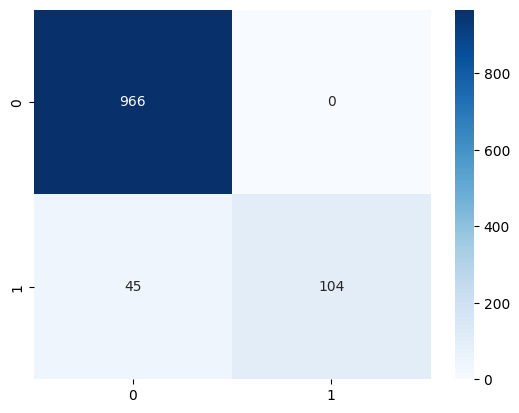

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='Blues')
plt.show()

#### Random Forest

In [80]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [81]:
rf.score(X_train, y_train)

1.0

In [82]:
y_pred = rf.predict(X_test)

In [83]:
print(accuracy_score(y_test, y_pred))

0.9748878923766816


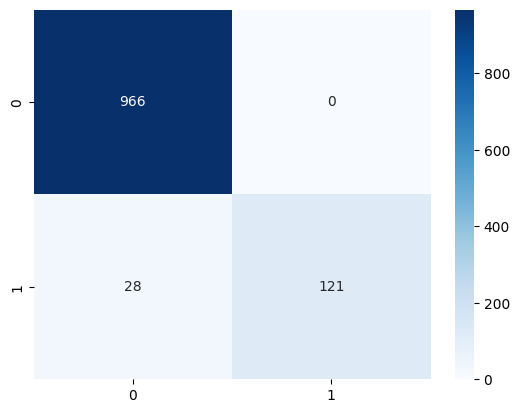

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='Blues')
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



#### XGBOOST

In [119]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
xgb.score(X_train, y_train)

0.9943908458604442

In [121]:
y_pred = xgb.predict(X_test)

In [122]:
print(accuracy_score(y_test, y_pred))

0.9721973094170404


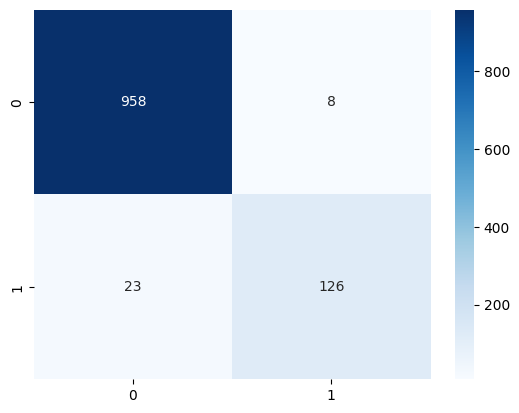

In [114]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='Blues')
plt.show()

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.94      0.85      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

